In [1]:
import napari
from napari_assistant._gui._Assistant import Assistant
from skimage.io import imread
from napari_assistant._categories import CATEGORIES
from napari_assistant._workflow_io_utility import initialise_root_functions, load_remaining_workflow
from napari_assistant._undo_redo import delete_workflow_widgets_layers
from napari_workflows import WorkflowManager

filename = 'C:/Users/ryans/OneDrive/Desktop/blobs.tif'
blobs = imread(filename)
blobs_modified = imread('C:/Users/ryans/OneDrive/Desktop/blobs_messed_up.tiff') 

viewer = napari.Viewer()
viewer.add_image(blobs_modified, name = 'not blobs')
viewer.add_image(blobs, name = 'blobs')

manager = WorkflowManager.install(viewer)
assistant = Assistant(viewer)
viewer.window.add_dock_widget(assistant)

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


2022-04-26 17:14:23.061 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-04-26 17:14:23.269 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


setting wf step: Result of gaussian_blur (clesperanto)
    args: (array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8),)
  kwargs: {'destination': None, 'sigma_x': 1.0, 'sigma_y': 1.0, 'sigma_z': 0.0}
no undos there
setting wf step: Result of gamma_correction (clesperanto)
    args: (cl.Array([[ 41.42875 ,  34.696438,  27.733936, ..., 220.92714 , 211.21162 ,
        206.71573 ],
       [ 47.421425,  38.878723,  30.323011, ..., 228.32323 , 220.60194 ,
        216.83534 ],
       [ 48.121433,  40.610855,  33.357384, ..., 235.32935 , 229.7049  ,
        226.8882  ],
       ...,
       [ 74.4386  ,  76.32904 ,  77.03725 , ...,  48.00032 ,  48.00075 ,
         48.001007],
       [ 81.793655,  81.17787 ,  79.80763 , ...,  48.      ,  48.      ,
         48.  

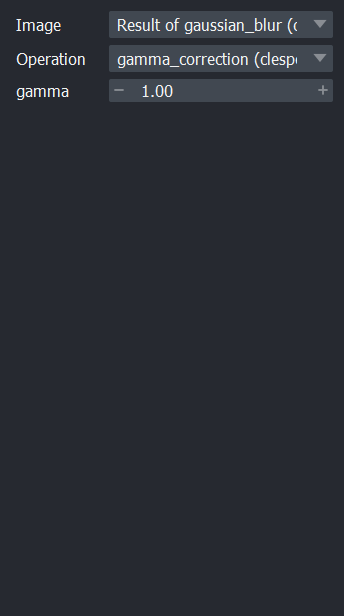

In [2]:
noise_widget = assistant._activate(CATEGORIES.get("Remove noise"))
assistant._activate(CATEGORIES.get("Filter"))

In [3]:
controller = manager.undo_redo_controller
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 1.0, 1.0, 0.0)



In [4]:
noise_widget["x"].value = 4

2022-04-26 17:14:23.962 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)
2022-04-26 17:14:23.981 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


setting wf step: Result of gamma_correction (clesperanto)
    args: (cl.Array([[ 36.956074,  35.081005,  33.288277, ..., 221.35294 , 218.56525 ,
        215.72932 ],
       [ 42.046062,  39.716633,  37.448833, ..., 228.4351  , 226.22757 ,
        223.9724  ],
       [ 43.593166,  41.570667,  39.553253, ..., 235.27147 , 233.68332 ,
        232.05185 ],
       ...,
       [ 73.06028 ,  72.592766,  71.86043 , ...,  48.541756,  48.271515,
         48.127243],
       [ 79.10255 ,  77.95612 ,  76.553406, ...,  48.945637,  48.478077,
         48.224342],
       [ 84.426056,  82.46323 ,  80.24901 , ...,  49.379055,  48.717056,
         48.348446]], dtype=float32),)
  kwargs: {'target': None, 'gamma': 1.0}
number of keys different
setting wf step: Result of gaussian_blur (clesperanto)
    args: (array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  

In [5]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000002042DC17820>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [6]:
noise_widget["x"].value = 8
for i in controller.undo_stack:
    print(i)

2022-04-26 17:14:24.080 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-26 17:14:24.101 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


setting wf step: Result of gamma_correction (clesperanto)
    args: (cl.Array([[ 39.131332,  39.15256 ,  39.450462, ..., 204.40215 , 206.43748 ,
        207.88336 ],
       [ 44.00539 ,  43.822056,  43.92381 , ..., 212.61302 , 214.76714 ,
        216.34825 ],
       [ 45.49747 ,  45.487076,  45.769276, ..., 220.98926 , 223.20772 ,
        224.8803  ],
       ...,
       [ 70.04506 ,  69.42343 ,  68.732574, ...,  57.644012,  55.61686 ,
         53.94002 ],
       [ 75.58775 ,  74.557175,  73.448746, ...,  60.864876,  58.24835 ,
         56.06287 ],
       [ 80.55064 ,  79.11243 ,  77.60104 , ...,  63.29813 ,  60.262505,
         57.70902 ]], dtype=float32),)
  kwargs: {'target': None, 'gamma': 1.0}
different dicts for workflow:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000002042DC17820>, 'Result of gaussian_blur (clesperanto

In [7]:
noise_widget["x"].value = 9
for i in controller.undo_stack:
    print(i)

2022-04-26 17:14:24.154 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-04-26 17:14:24.173 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


setting wf step: Result of gamma_correction (clesperanto)
    args: (cl.Array([[ 41.114178,  41.623768,  42.432503, ..., 199.07964 , 201.66302 ,
        203.71596 ],
       [ 46.01793 ,  46.354156,  46.99531 , ..., 207.40353 , 210.09584 ,
        212.2658  ],
       [ 47.57213 ,  48.071354,  48.879955, ..., 215.97003 , 218.71626 ,
        220.956   ],
       ...,
       [ 69.51052 ,  68.91542 ,  68.26906 , ...,  60.666653,  58.427227,
         56.4953  ],
       [ 74.959145,  73.998405,  72.98305 , ...,  64.51832 ,  61.68072 ,
         59.216393],
       [ 79.9174  ,  78.6086  ,  77.25336 , ...,  67.329895,  64.08088 ,
         61.24526 ]], dtype=float32),)
  kwargs: {'target': None, 'gamma': 1.0}
different dicts for workflow:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000002042DC17820>, 'Result of gaussian_blur (clesperanto

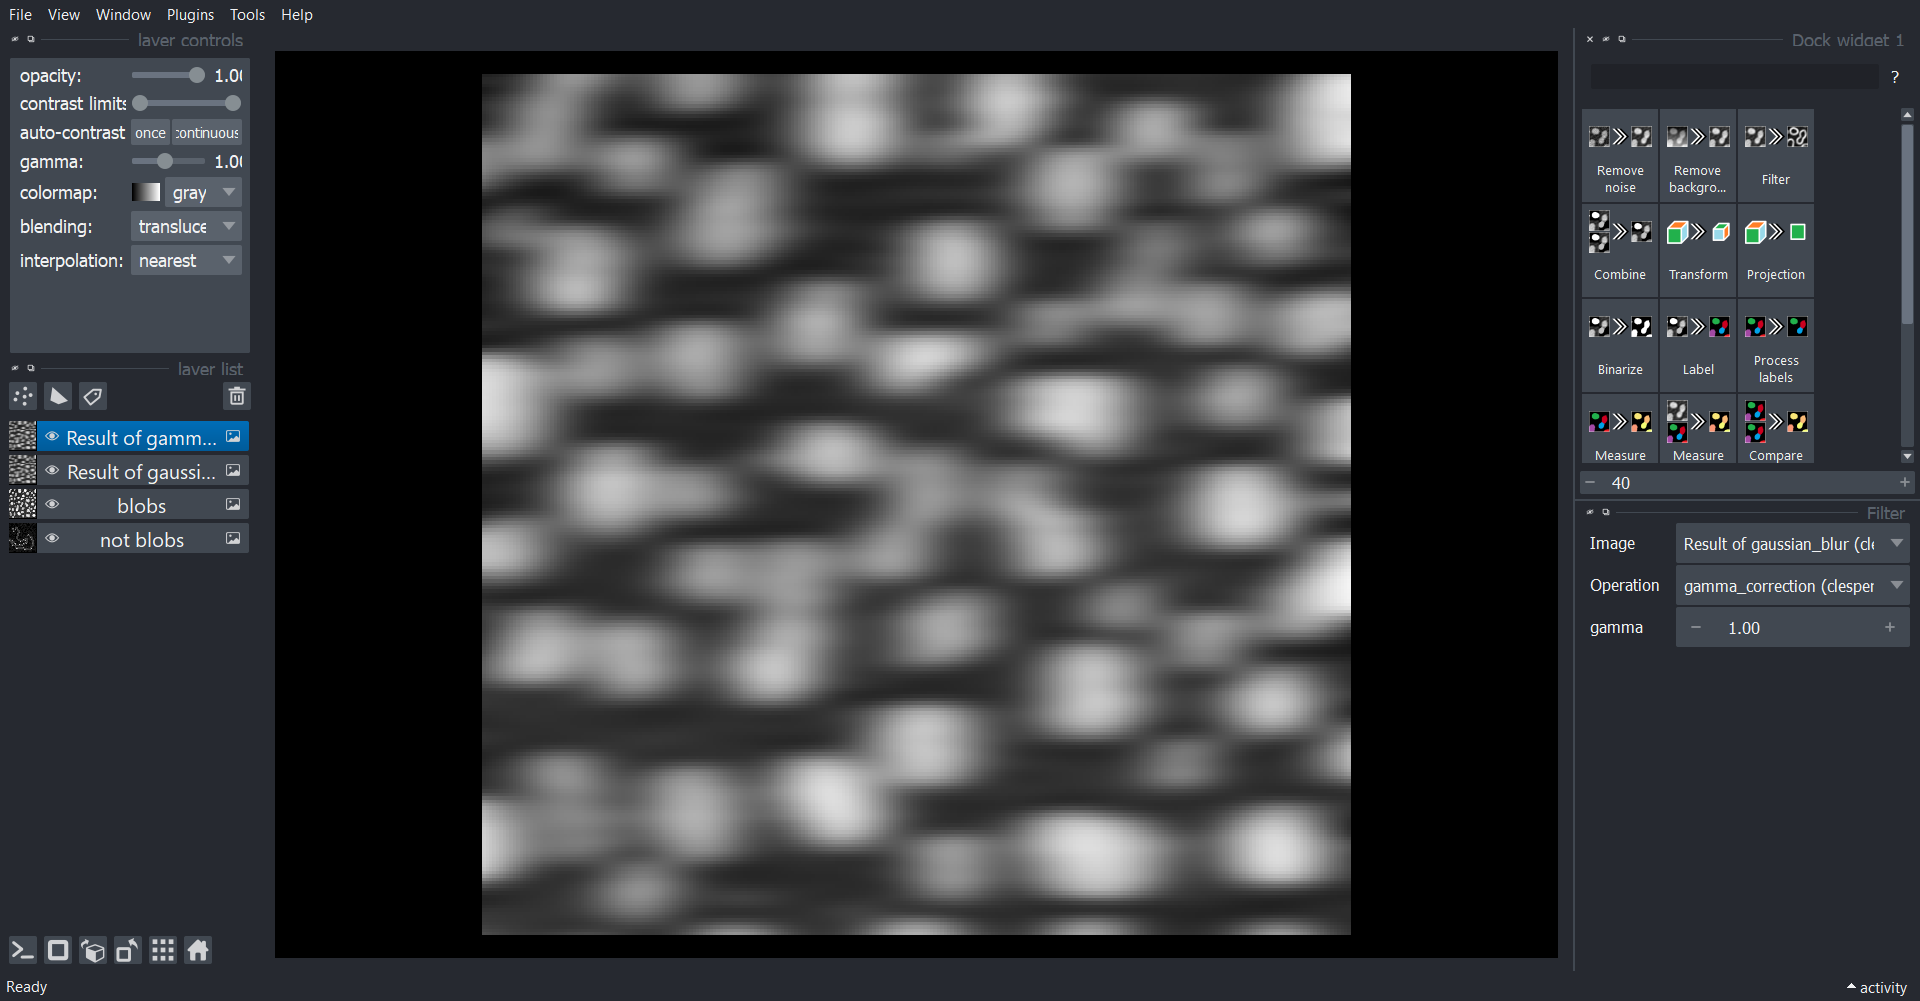

In [8]:
napari.utils.nbscreenshot(viewer)

In [9]:
controller.freeze_stacks = True
delete_workflow_widgets_layers(viewer)
controller.freeze_stacks = False

for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000002042DC17820>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000002042DC17820>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000002042DB9F820>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000002042DC17820>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



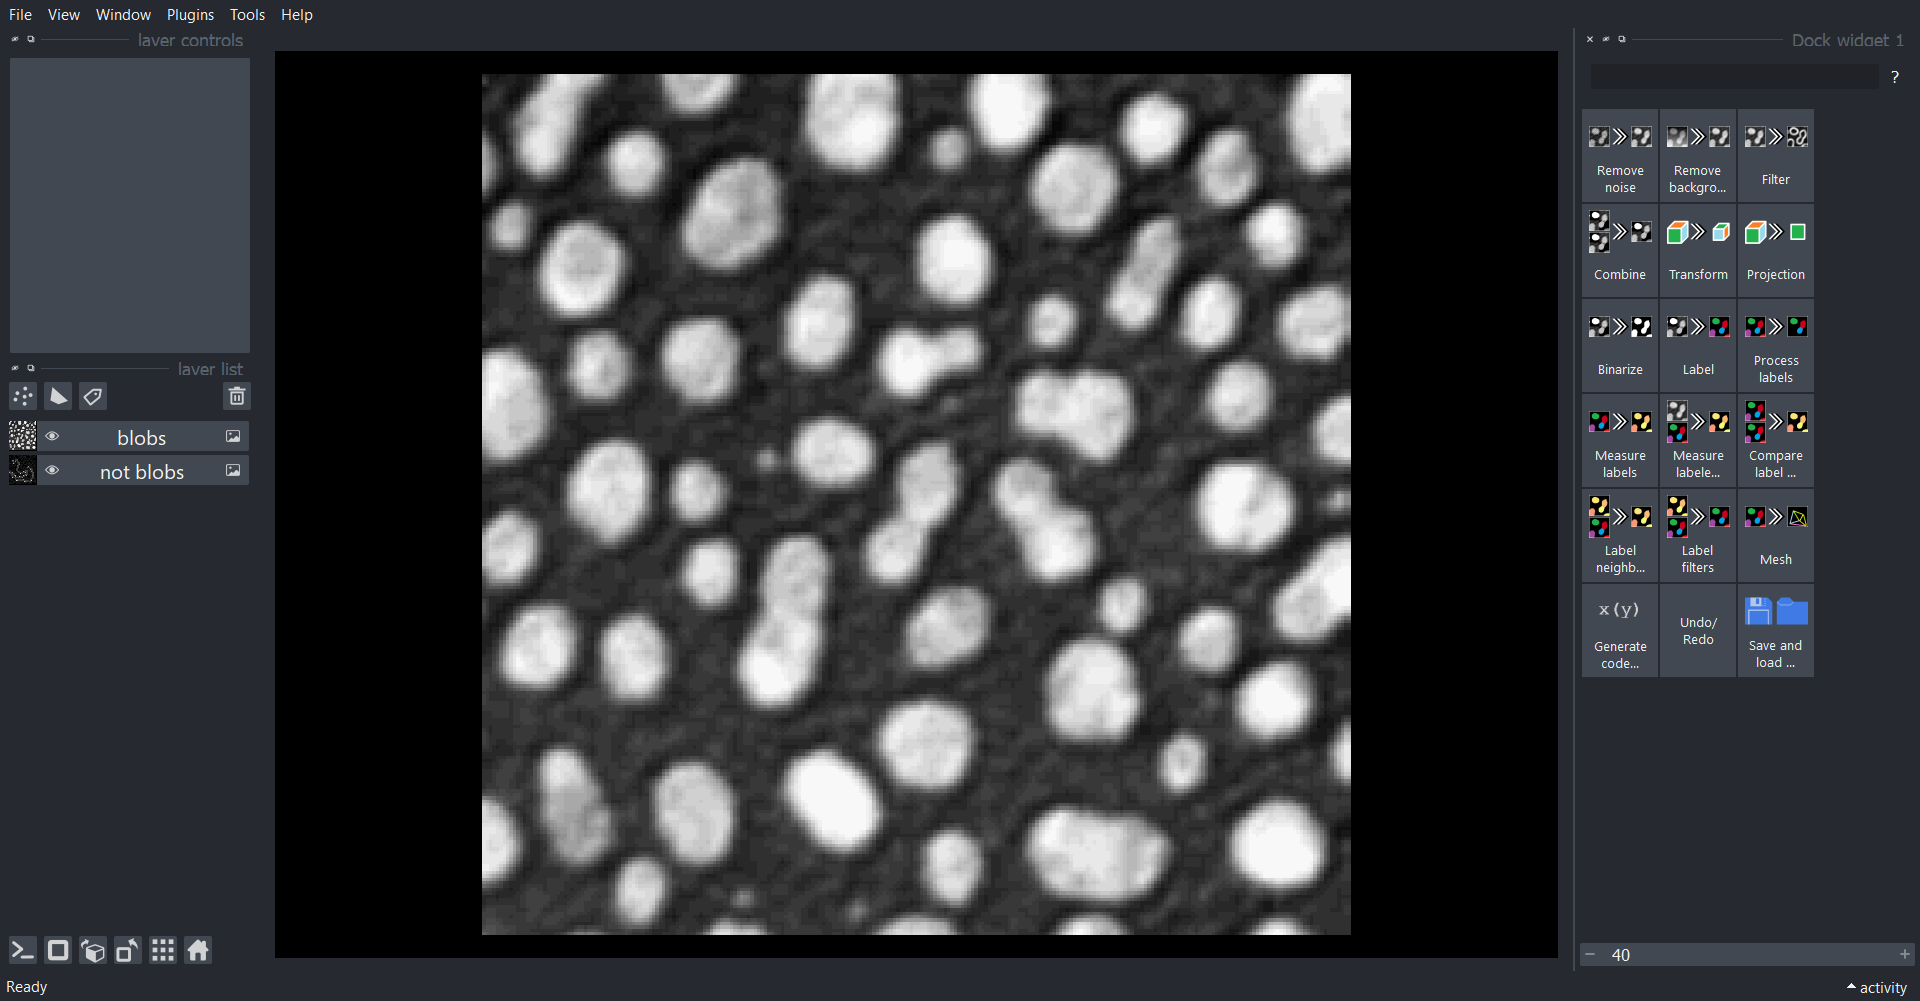

In [10]:
napari.utils.nbscreenshot(viewer)

In [12]:
undone_wf = controller.undo()
controller.freeze_stacks = True
initialise_root_functions(viewer=viewer,workflow = undone_wf)

2022-04-26 17:21:43.571 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)


setting wf step: Result of gaussian_blur (clesperanto)
    args: (array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8),)
  kwargs: {'destination': None, 'sigma_x': 4.0, 'sigma_y': 1.0, 'sigma_z': 0.0}


[(<FunctionGui do_remove_noise(*, input0: napari.layers.image.image.Image = <Image layer 'blobs' at 0x20441ea8490>, op_name: str = 'gaussian_blur (clesperanto)', x: float = 4.0, y: float = 1.0, z: float = 0.0, u: float = 0.0, v: float = 0.0, w: float = 0.0, a: bool = False, b: bool = False, c: bool = False, k: str = '', l: str = '', m: str = '', viewer: napari.viewer.Viewer = Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 126.5, 127.5), zoom=3.3923228346456686, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 254.0, 1.0), (0.0, 256.0, 1.0)), current_step=(127, 128), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=-1, shape=(-1, -1), enabled=False), layers=[<Image layer 'not blobs' at 0x204277bc100>, <Image layer 'blobs' at 0x20441ea8490>, <Image 

In [14]:
load_remaining_workflow(viewer=viewer,workflow = undone_wf, button_size=32)
controller.freeze_stacks = False

2022-04-26 17:22:47.493 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


setting wf step: Result of gamma_correction (clesperanto)
    args: (cl.Array([[ 36.956074,  35.081005,  33.288277, ..., 221.35294 , 218.56525 ,
        215.72932 ],
       [ 42.046062,  39.716633,  37.448833, ..., 228.4351  , 226.22757 ,
        223.9724  ],
       [ 43.593166,  41.570667,  39.553253, ..., 235.27147 , 233.68332 ,
        232.05185 ],
       ...,
       [ 73.06028 ,  72.592766,  71.86043 , ...,  48.541756,  48.271515,
         48.127243],
       [ 79.10255 ,  77.95612 ,  76.553406, ...,  48.945637,  48.478077,
         48.224342],
       [ 84.426056,  82.46323 ,  80.24901 , ...,  49.379055,  48.717056,
         48.348446]], dtype=float32),)
  kwargs: {'target': None, 'gamma': 1.0}


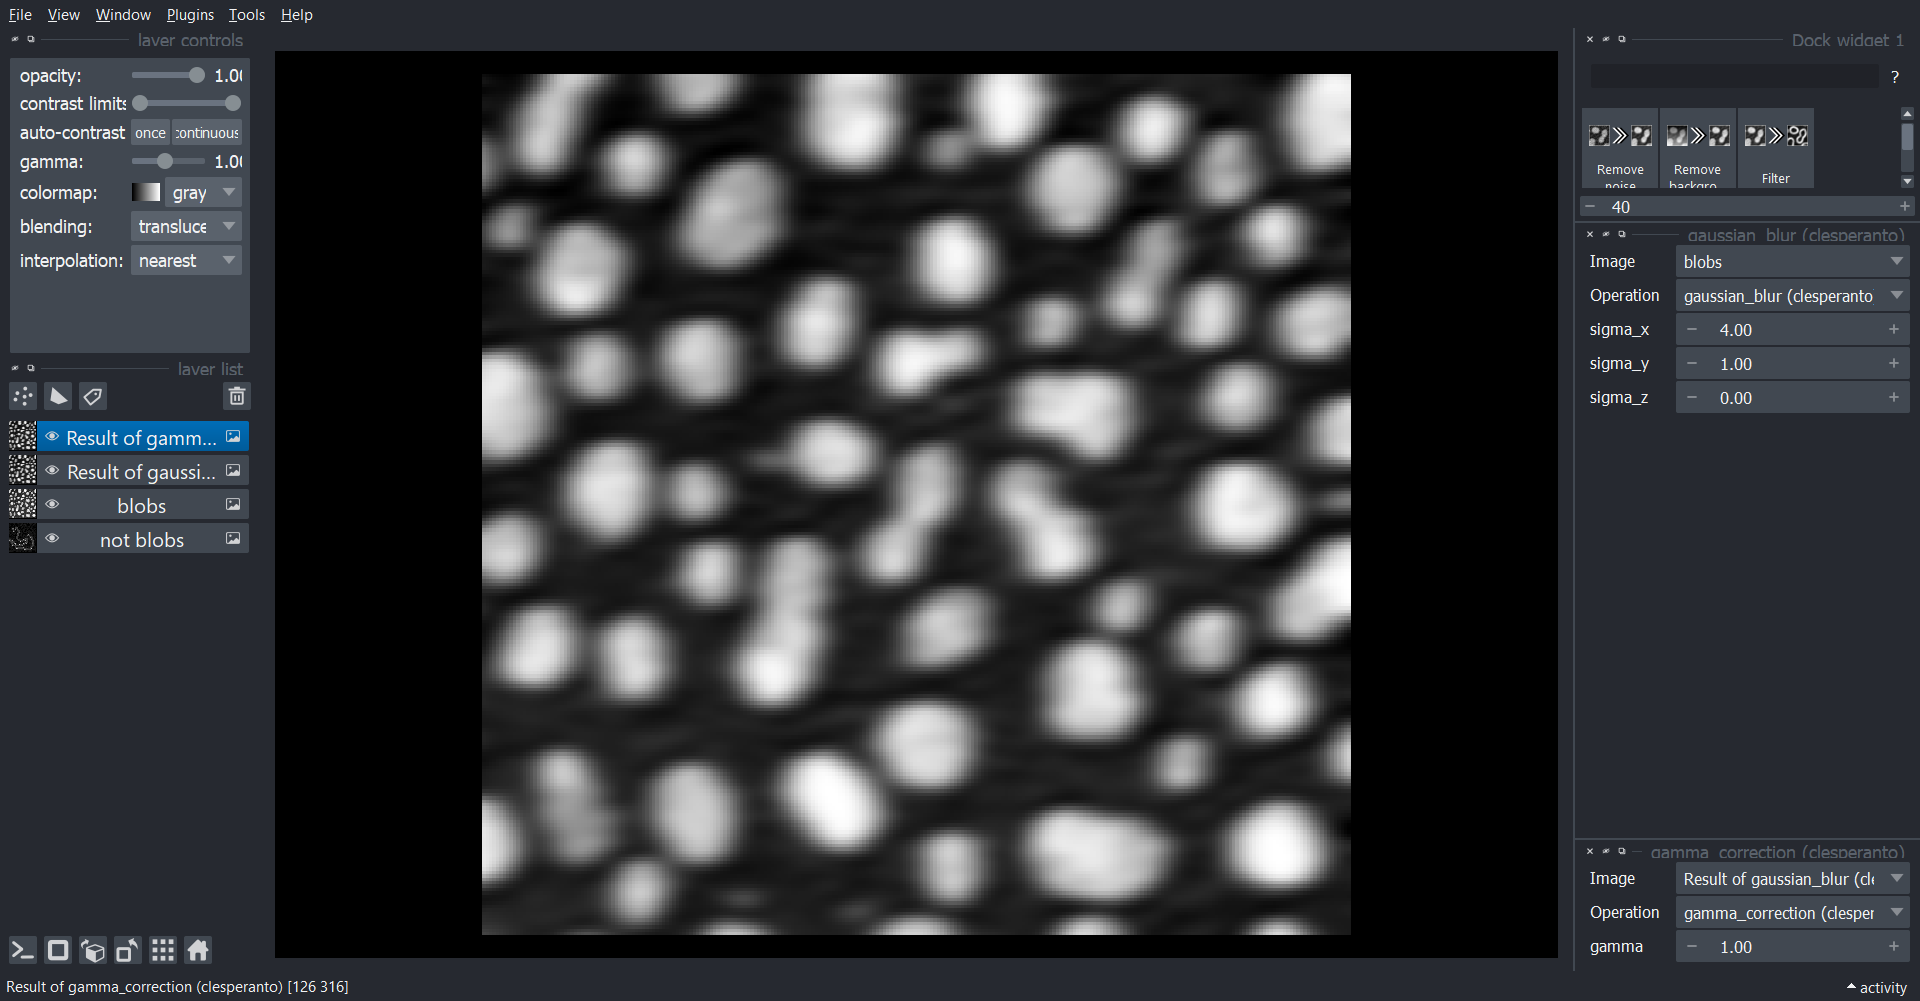

In [15]:
napari.utils.nbscreenshot(viewer)